In [1]:
import geopandas as gpd
import geojsonio

%matplotlib inline
import pandas as pd
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
data = gpd.read_file("earthquakes_data_json.geojson")

In [3]:
data.head()



,date,depth,mag,id,place,geometry
0,19600102,15.0,6.3,iscgem877909,Bouvet Island region,POINT (-1.89000 -55.87700)
1,19600103,15.0,5.7,iscgem877920,"northern Xinjiang, China",POINT (84.54200 43.70000)
2,19600104,15.0,6.1,iscgemsup877930,Djibouti,POINT (42.60900 11.37400)
3,19600107,55.0,5.5,iscgem877960,"Nicobar Islands, India region",POINT (94.54700 6.35200)
4,19600107,15.0,5.6,iscgem877954,"Nicobar Islands, India region",POINT (94.75600 6.41800)


In [4]:
data.geometry.unique()

<GeometryArray>
 ...
Length: 24632, dtype: geometry

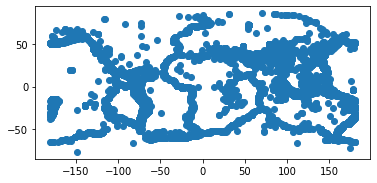

In [5]:
data.plot()

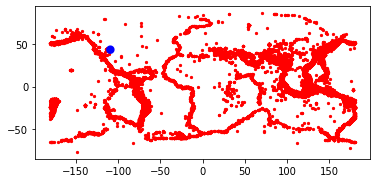

In [18]:
# Create Fake Data
df = pd.DataFrame(data)

df.head()

# create Geometry series with lat / longitude
geometry = [Point(xy) for xy in (df.geometry)]


# df = df.drop(['Longitude', 'Latitude'], axis = 1)

# Create GeoDataFrame
points = gp.GeoDataFrame(df, crs=None, geometry=geometry)

# Create Matplotlib figure
fig, ax = plt.subplots()

# Set Axes to equal (otherwise plot looks weird)
ax.set_aspect('equal')

# Plot GeoDataFrame on Axis ax
points.plot(ax=ax,marker='o', color='red', markersize=5)

# Create new point
center_coord = [Point(-109.1, 43.8)]
center = gp.GeoDataFrame(crs=None, geometry=center_coord)

# Plot new point
center.plot(ax=ax,color = 'blue',markersize=5)
# Buffer point and plot it
circle = gp.GeoDataFrame(crs=None, geometry=center.buffer(5.0))  # 5.0 = 250 miles

circle.plot(color = 'blue',ax=ax)

           date  depth  mag            id                               place  \
658    19620830   15.0  5.9  iscgem875249                                Utah   
4758   19750328    5.0  6.1    usp0000ad8                      southern Idaho   
4863   19750630    7.0  5.9    usp0000buf  Yellowstone National Park, Wyoming   
5527   19761208    5.0  5.5    usp0000kp6  Yellowstone National Park, Wyoming   
8112   19831028   10.0  6.9    usp0001zbv                      southern Idaho   
8477   19840822   10.0  5.6    usp00026m2                      southern Idaho   
13067  19940203    7.9  5.8    usp00067xb                             Wyoming   
18779  20050726   12.9  5.6    usp000dvxx                     western Montana   

                          geometry  index_right  
658    POINT (-111.49700 41.96100)            0  
4758   POINT (-112.54800 42.06100)            0  
4863   POINT (-110.60500 44.74500)            0  
5527   POINT (-110.79300 44.76000)            0  
8112   POINT (-113.8

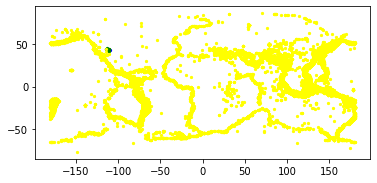

In [19]:
# Calculate the points inside the circle 

pointsinside = gp.sjoin(points,circle,how="inner")
print(pointsinside)
pointsinside.type




# Now the points outside the circle is just the difference 
# between  points and points inside (see the ~)

pointsoutside = points[~points.index.isin(pointsinside.index)]


# Create a nice plot 
fig, ax = plt.subplots()
ax.set_aspect('equal')
circle.plot(color = 'white',ax=ax)
center.plot(ax=ax,color = 'blue',markersize=5)
pointsinside.plot(ax=ax,marker='o', color='green', markersize=5)

pointsoutside.plot(ax=ax,marker='o', color='yellow', markersize=5)

print('Total points:' ,len(points))
print('Points inside circle:' ,len(pointsinside))
print('Points outside circle:' ,len(pointsoutside))

In [20]:
pointsinside.type

658      Point
4758     Point
4863     Point
5527     Point
8112     Point
8477     Point
13067    Point
18779    Point
dtype: object

In [21]:
pointsinside.apply(lambda x: x.name).to_dict()

{'date': 'date',
 'depth': 'depth',
 'mag': 'mag',
 'id': 'id',
 'place': 'place',
 'geometry': 'geometry',
 'index_right': 'index_right'}

In [22]:
pointsinside["geometry"]

658      POINT (-111.49700 41.96100)
4758     POINT (-112.54800 42.06100)
4863     POINT (-110.60500 44.74500)
5527     POINT (-110.79300 44.76000)
8112     POINT (-113.85700 44.05800)
8477     POINT (-114.00800 44.46700)
13067    POINT (-110.97600 42.76200)
18779    POINT (-112.61500 45.36500)
Name: geometry, dtype: geometry

In [23]:
pointsinside['lat'] = pointsinside['geometry'].x
pointsinside['long'] = pointsinside['geometry'].y
pointsinside

,date,depth,mag,id,place,geometry,index_right,lat,long
658,19620830,15.0,5.9,iscgem875249,Utah,POINT (-111.49700 41.96100),0,-111.497,41.961
4758,19750328,5.0,6.1,usp0000ad8,southern Idaho,POINT (-112.54800 42.06100),0,-112.548,42.061
4863,19750630,7.0,5.9,usp0000buf,"Yellowstone National Park, Wyoming",POINT (-110.60500 44.74500),0,-110.605,44.745
5527,19761208,5.0,5.5,usp0000kp6,"Yellowstone National Park, Wyoming",POINT (-110.79300 44.76000),0,-110.793,44.760
8112,19831028,10.0,6.9,usp0001zbv,southern Idaho,POINT (-113.85700 44.05800),0,-113.857,44.058
8477,19840822,10.0,5.6,usp00026m2,southern Idaho,POINT (-114.00800 44.46700),0,-114.008,44.467
13067,19940203,7.9,5.8,usp00067xb,Wyoming,POINT (-110.97600 42.76200),0,-110.976,42.762
18779,20050726,12.9,5.6,usp000dvxx,western Montana,POINT (-112.61500 45.36500),0,-112.615,45.365


In [24]:
pointsinside.to_dict('records')

[{'date': 19620830,
  'depth': 15.0,
  'mag': 5.9,
  'id': 'iscgem875249',
  'place': 'Utah',
  'geometry': <shapely.geometry.point.Point at 0x21cb49fca88>,
  'index_right': 0,
  'lat': -111.497,
  'long': 41.961},
 {'date': 19750328,
  'depth': 5.0,
  'mag': 6.1,
  'id': 'usp0000ad8',
  'place': 'southern Idaho',
  'geometry': <shapely.geometry.point.Point at 0x21cb4da7d88>,
  'index_right': 0,
  'lat': -112.548,
  'long': 42.061},
 {'date': 19750630,
  'depth': 7.0,
  'mag': 5.9,
  'id': 'usp0000buf',
  'place': 'Yellowstone National Park, Wyoming',
  'geometry': <shapely.geometry.point.Point at 0x21cb4da4648>,
  'index_right': 0,
  'lat': -110.605,
  'long': 44.745},
 {'date': 19761208,
  'depth': 5.0,
  'mag': 5.5,
  'id': 'usp0000kp6',
  'place': 'Yellowstone National Park, Wyoming',
  'geometry': <shapely.geometry.point.Point at 0x21cb4d7ce48>,
  'index_right': 0,
  'lat': -110.793,
  'long': 44.76},
 {'date': 19831028,
  'depth': 10.0,
  'mag': 6.9,
  'id': 'usp0001zbv',
  'plac

In [25]:
# ask the user for lat and long, and radius
# 2: manipulation from above to get the pointsinside
# turn pointsinside dict into a json 
# serve as a json/api and consume in javascript 

# do all of this inside app.py 

In [26]:
df = pointsinside
df = df.drop(columns = ['index_right', 'lat', 'long'])
# def df_to_geojson(df):
# # def df_to_geojson(df, properties, lat='latitude', lon='longitude'):    
#     geojson = {'type':'FeatureCollection', 'features':[]}
#     for _, row in df.iterrows():
#         feature = {'type':'Feature',
#                    'properties':{},
#                    'geometry':{'type':'Point',
#                                'coordinates':[]}}
#         feature['geometry']['coordinates'] = [row[lon],row[lat]]
#         for prop in properties:
#             feature['properties'][prop] = row[prop]
#         geojson['features'].append(feature)
#     return geojson


In [27]:
# geojson = df_to_geojson(df)
df.to_file("output.geojson", driver="GeoJSON")

# countries_gdf.to_file("countries.geojson", driver='GeoJSON')

In [28]:
data = gp.write_file("filtered_earthquakes_data.geojson")

AttributeError: module 'geopandas' has no attribute 'write_file'